In [34]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_vaccine_statewise.csv
/kaggle/input/covid19-in-india/covid_19_india.csv


In [35]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime as dt
import numpy as np

# Importing Dataset

In [36]:
df = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv', parse_dates=['Date'], dayfirst=True)

In [37]:
df.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [38]:
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']

In [39]:
#Looking at the earlier dates
df.head(5)

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [40]:
#looking at the latest dates
df.tail()

,date,state,cured,deaths,confirmed
15549,2021-06-01,Telangana,540986,3281,578351
15550,2021-06-01,Tripura,44908,519,51974
15551,2021-06-01,Uttarakhand,294671,6452,329494
15552,2021-06-01,Uttar Pradesh,1633947,20497,1691488
15553,2021-06-01,West Bengal,1273788,15541,1376377


In [41]:
#current date
today = df[df.date == '2021-05-19']


In [42]:
today

,date,state,cured,deaths,confirmed
15050,2021-05-19,Andaman and Nicobar Islands,6359,92,6674
15051,2021-05-19,Andhra Pradesh,1254291,9580,1475372
15052,2021-05-19,Arunachal Pradesh,19977,88,22462
15053,2021-05-19,Assam,290774,2344,340858
15054,2021-05-19,Bihar,595377,4039,664115
15055,2021-05-19,Chandigarh,48831,647,56513
15056,2021-05-19,Chhattisgarh,823113,12036,925531
15057,2021-05-19,Dadra and Nagar Haveli and Daman and Diu,8944,4,9652
15058,2021-05-19,Delhi,1329899,22111,1402873
15059,2021-05-19,Goa,112633,2197,138776


# Sorting data with number of confirmed cases

In [43]:
max_confirmed_cases=today.sort_values(by="confirmed",ascending=False)
max_confirmed_cases

,date,state,cured,deaths,confirmed
15070,2021-05-19,Maharashtra,4927480,83777,5433506
15065,2021-05-19,Karnataka,1674487,22838,2272374
15066,2021-05-19,Kerala,1846105,6612,2200706
15080,2021-05-19,Tamil Nadu,1403052,18369,1664350
15084,2021-05-19,Uttar Pradesh,1483249,18072,1637663
15051,2021-05-19,Andhra Pradesh,1254291,9580,1475372
15058,2021-05-19,Delhi,1329899,22111,1402873
15085,2021-05-19,West Bengal,1026492,13576,1171861
15056,2021-05-19,Chhattisgarh,823113,12036,925531
15078,2021-05-19,Rajasthan,713129,7080,879664


In [44]:
#Getting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:5]

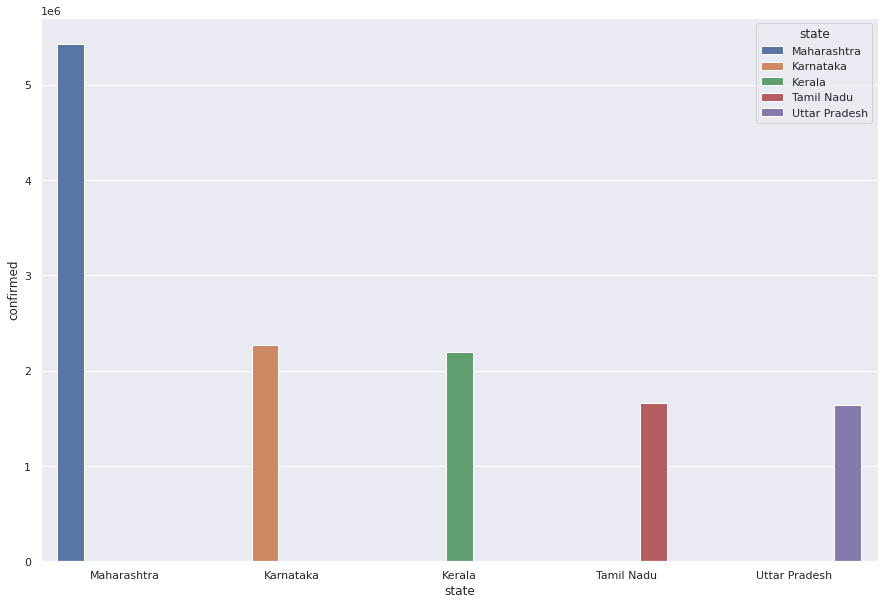

In [45]:
#Making bar-plot for states with top confirmed cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")
plt.show()

# Sorting data with number of death cases

In [46]:

max_death_cases=today.sort_values(by="deaths",ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
15070,2021-05-19,Maharashtra,4927480,83777,5433506
15065,2021-05-19,Karnataka,1674487,22838,2272374
15058,2021-05-19,Delhi,1329899,22111,1402873
15080,2021-05-19,Tamil Nadu,1403052,18369,1664350
15084,2021-05-19,Uttar Pradesh,1483249,18072,1637663
15085,2021-05-19,West Bengal,1026492,13576,1171861
15077,2021-05-19,Punjab,427058,12317,511652
15056,2021-05-19,Chhattisgarh,823113,12036,925531
15051,2021-05-19,Andhra Pradesh,1254291,9580,1475372
15060,2021-05-19,Gujarat,660489,9269,766201


In [47]:
#Getting states with maximum number of death cases
top_states_death=max_death_cases[0:5]

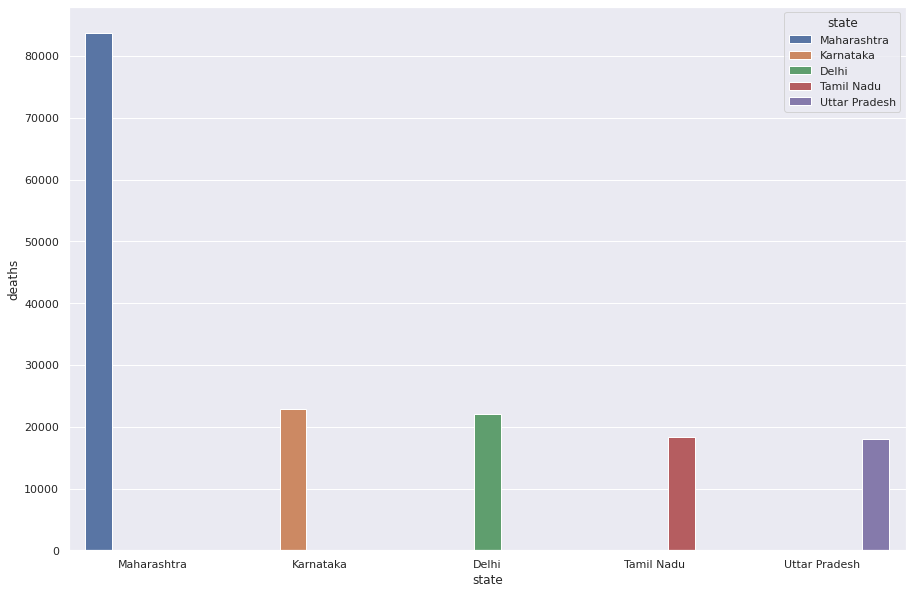

In [48]:
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="deaths",data=top_states_death,hue="state")
plt.show()

# Sorting data w.r.t number of cured cases

In [49]:
max_cured_cases=today.sort_values(by="cured",ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
15070,2021-05-19,Maharashtra,4927480,83777,5433506
15066,2021-05-19,Kerala,1846105,6612,2200706
15065,2021-05-19,Karnataka,1674487,22838,2272374
15084,2021-05-19,Uttar Pradesh,1483249,18072,1637663
15080,2021-05-19,Tamil Nadu,1403052,18369,1664350
15058,2021-05-19,Delhi,1329899,22111,1402873
15051,2021-05-19,Andhra Pradesh,1254291,9580,1475372
15085,2021-05-19,West Bengal,1026492,13576,1171861
15056,2021-05-19,Chhattisgarh,823113,12036,925531
15078,2021-05-19,Rajasthan,713129,7080,879664


In [50]:
#Getting states with maximum number of cured cases
top_states_cured=max_cured_cases[0:5]

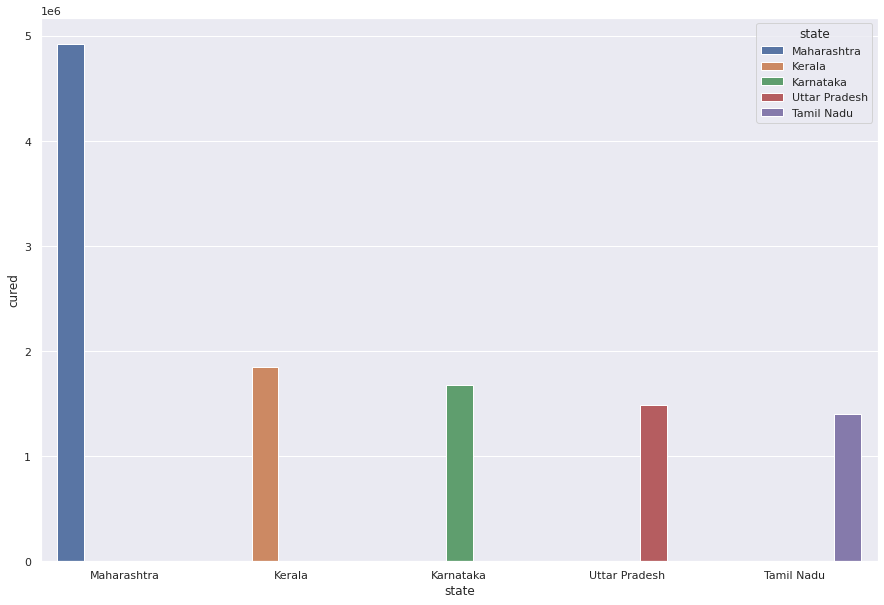

In [51]:
#Making bar-plot for states with top cured cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="cured",data=top_states_cured,hue="state")
plt.show()

**From the above graphplot we got to know that maharashtra has most alarming situation

# Maharashtra

In [52]:
#Maharashtra
MH = df[df.state == 'Maharashtra']

In [53]:
MH

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
15394,2021-05-28,Maharashtra,5276203,92225,5672180
15430,2021-05-29,Maharashtra,5307874,93198,5692920
15466,2021-05-30,Maharashtra,5339838,94030,5713215
15502,2021-05-31,Maharashtra,5362370,94844,5731815


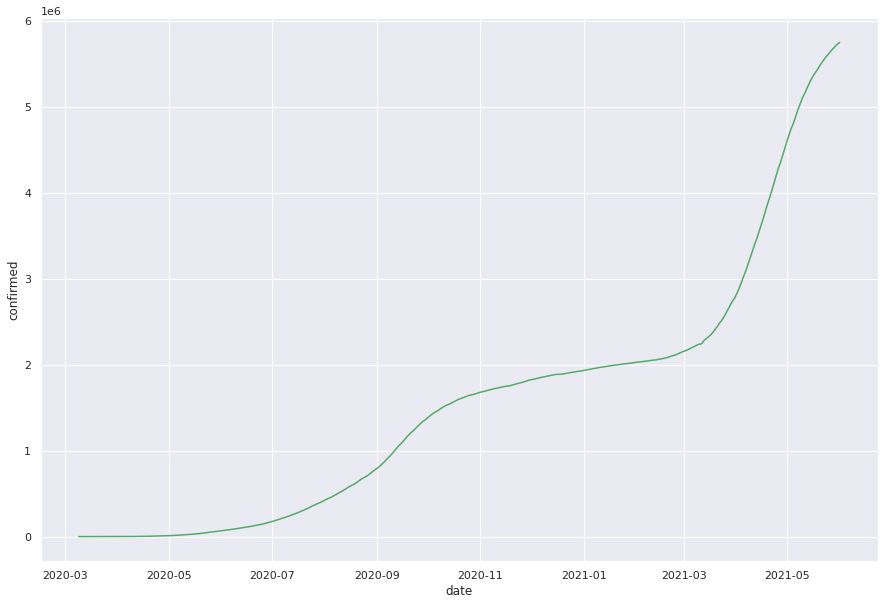

In [54]:
#Visualizing confirmed cases in maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=MH,color="g")
plt.show()

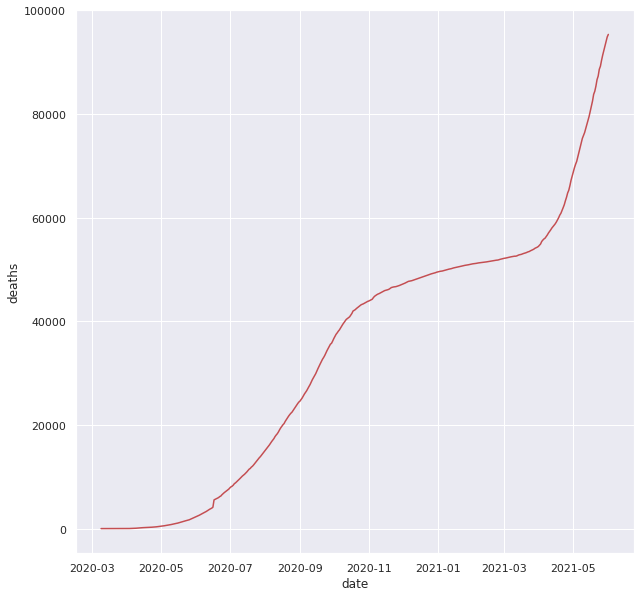

In [55]:
#Visualizing death cases in maharashtra
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x="date",y="deaths",data=MH,color="r")
plt.show()

In [56]:
#Karnataka
KA = df[df.state == 'Karnataka']
KA

,date,state,cured,deaths,confirmed
74,2020-03-09,Karnataka,0,0,1
89,2020-03-10,Karnataka,0,0,4
108,2020-03-11,Karnataka,0,0,4
119,2020-03-12,Karnataka,0,0,4
132,2020-03-13,Karnataka,0,1,6
...,...,...,...,...,...
15389,2021-05-28,Karnataka,2094369,27405,2523998
15425,2021-05-29,Karnataka,2146621,27806,2546821
15461,2021-05-30,Karnataka,2189064,28298,2567449
15497,2021-05-31,Karnataka,2217117,28679,2587827


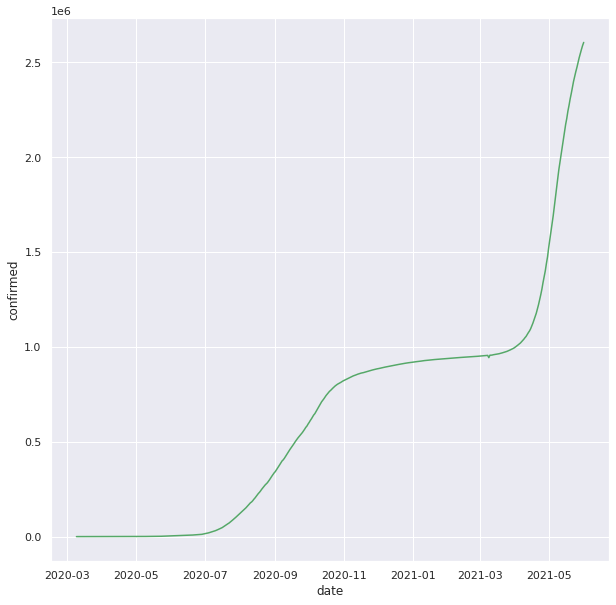

In [57]:
#Visualizing confirmed cases in Karnataka
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x="date",y="confirmed",data=KA,color="g")
plt.show()

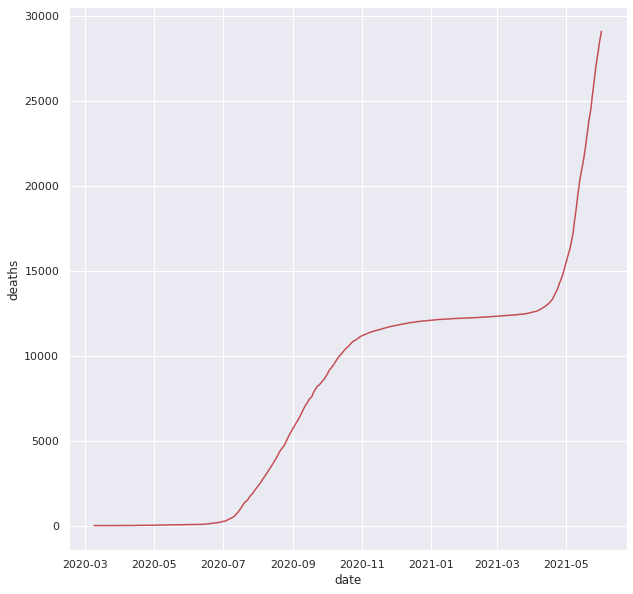

In [58]:
#Visualizing death cases in Karnataka
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x="date",y="deaths",data=KA,color="r")
plt.show()

# Kerala

In [59]:
#Kerala
KL= df[df.state == 'Kerala']
KL

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
15390,2021-05-28,Kerala,2198135,8063,2448554
15426,2021-05-29,Kerala,2224405,8257,2470872
15462,2021-05-30,Kerala,2252505,8455,2494385
15498,2021-05-31,Kerala,2281518,8641,2514279


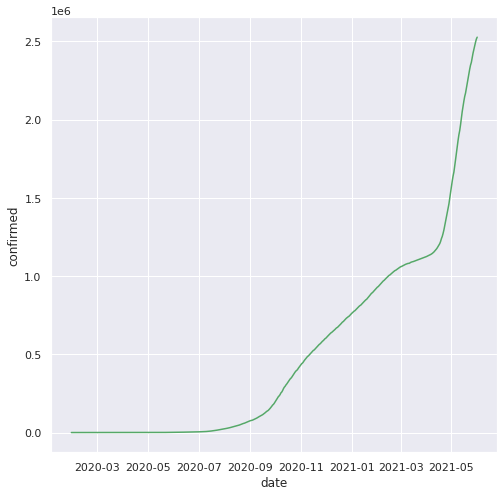

In [60]:
#Visualizing confirmed cases in Kerala
sns.set(rc={'figure.figsize':(8,8)})
sns.lineplot(x="date",y="confirmed",data=KL,color="g")
plt.show()

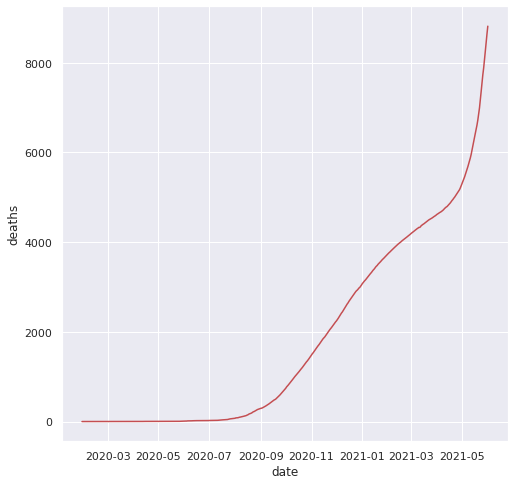

In [61]:
#Visualizing death cases in Kerala
sns.set(rc={'figure.figsize':(8,8)})
sns.lineplot(x="date",y="deaths",data=KL,color="r")
plt.show()

** Analysis For my state - Madhya Pradesh**

# Madhya Pradesh

In [62]:
MP= df[df.state == 'Madhya Pradesh']
MP

,date,state,cured,deaths,confirmed
256,2020-03-21,Madhya Pradesh,0,0,4
279,2020-03-22,Madhya Pradesh,0,0,4
302,2020-03-23,Madhya Pradesh,0,0,6
325,2020-03-24,Madhya Pradesh,0,0,7
349,2020-03-25,Madhya Pradesh,0,0,14
...,...,...,...,...,...
15393,2021-05-28,Madhya Pradesh,727700,7828,773855
15429,2021-05-29,Madhya Pradesh,733496,7891,775709
15465,2021-05-30,Madhya Pradesh,738491,7959,777349
15501,2021-05-31,Madhya Pradesh,743550,8019,778825


**Visualizing confirmed cases in MP**

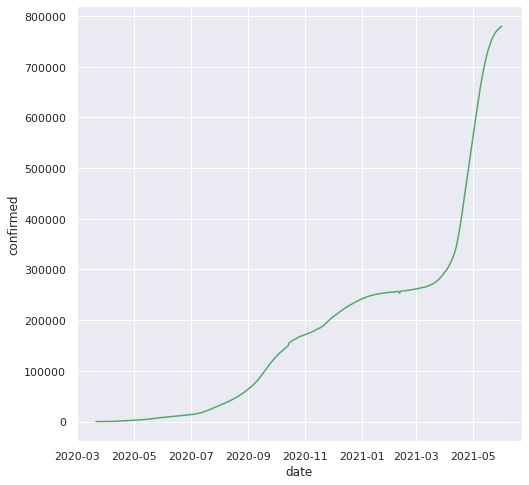

In [63]:

sns.set(rc={'figure.figsize':(8,8)})
sns.lineplot(x="date",y="confirmed",data=MP,color="g")
plt.show()

**Visualizing death cases in Kerala**

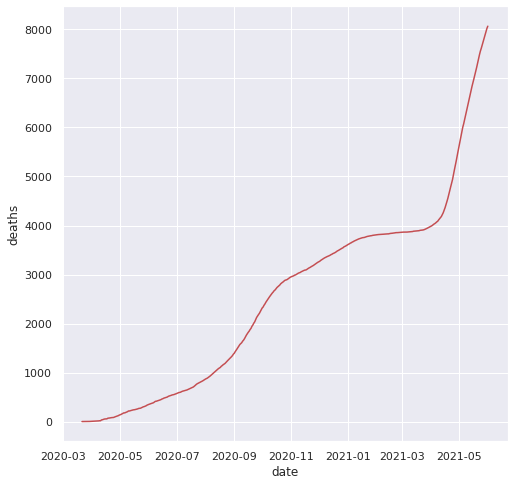

In [64]:
sns.set(rc={'figure.figsize':(8,8)})
sns.lineplot(x="date",y="deaths",data=MP,color="r")
plt.show()